In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Read the 1st dataset
covid_df = pd.read_csv('/Users/ngocnguyen/Desktop/CPP/GBB 6070 - Intro to Programming/project/us-counties-2023-01-01.csv')
covid_df.head(10)

,date,county,state,fips,cases,deaths
0,01/01/2023,Autauga,Alabama,1001.0,18961,230.0
1,01/01/2023,Baldwin,Alabama,1003.0,67496,719.0
2,01/01/2023,Barbour,Alabama,1005.0,7027,111.0
3,01/01/2023,Bibb,Alabama,1007.0,7692,108.0
4,01/01/2023,Blount,Alabama,1009.0,17731,260.0
5,01/01/2023,Bullock,Alabama,1011.0,2886,54.0
6,01/01/2023,Butler,Alabama,1013.0,6185,130.0
7,01/01/2023,Calhoun,Alabama,1015.0,39458,665.0
8,01/01/2023,Chambers,Alabama,1017.0,10311,174.0
9,01/01/2023,Cherokee,Alabama,1019.0,6456,133.0


In [22]:
# Access the dataset information
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3255 non-null   object 
 1   county  3255 non-null   object 
 2   state   3255 non-null   object 
 3   fips    3219 non-null   float64
 4   cases   3255 non-null   int64  
 5   deaths  3177 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 152.7+ KB


In [23]:
# Deleting 2 unnecessary columns
covid_df.drop(['fips', 'date'], axis = 1, inplace = True)
covid_df.head()

,county,state,cases,deaths
0,Autauga,Alabama,18961,230.0
1,Baldwin,Alabama,67496,719.0
2,Barbour,Alabama,7027,111.0
3,Bibb,Alabama,7692,108.0
4,Blount,Alabama,17731,260.0


In [24]:
# Add in the '%death_rate' column
covid_df['%death_rate'] = covid_df['deaths'] / covid_df['cases'] * 100

In [25]:
# Define a function to show 2 digits
def two_digits(series):
    return series.round(2)

covid_df['%death_rate'] = two_digits(covid_df['%death_rate'])
covid_df.head()

,county,state,cases,deaths,%death_rate
0,Autauga,Alabama,18961,230.0,1.21
1,Baldwin,Alabama,67496,719.0,1.07
2,Barbour,Alabama,7027,111.0,1.58
3,Bibb,Alabama,7692,108.0,1.40
4,Blount,Alabama,17731,260.0,1.47


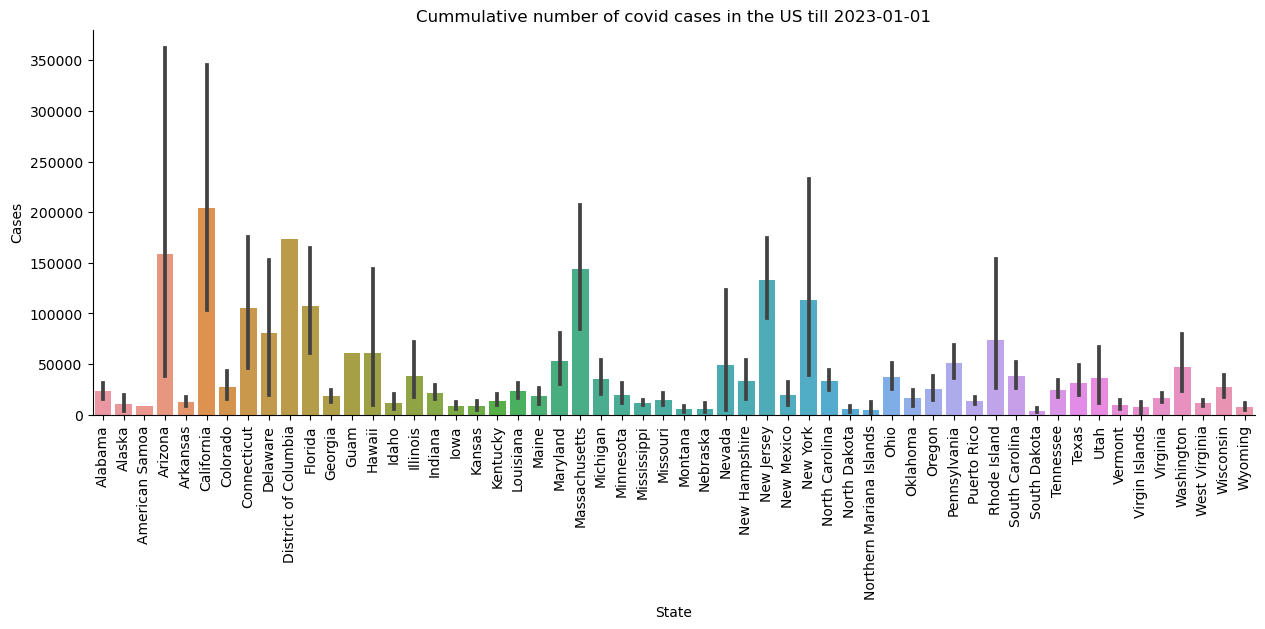

In [26]:
# Visualization with barplot
plt.figure(figsize = (15,5))
sns.barplot(x = 'state', y = 'cases', data = covid_df)

plt.xlabel('State')
plt.ylabel('Cases')
plt.title('Cummulative number of covid cases in the US till 2023-01-01')
plt.xticks(rotation = 90)

sns.despine()
plt.show()

In [27]:
# Finding the state with highest cases recored
covid_df.groupby('state')['cases'].max().idxmax()

'California'

In [28]:
# Extract the number of cases recored in California
california_df = covid_df[covid_df['state'] == 'California']
california_df.head(10)

,county,state,cases,deaths,%death_rate
188,Alameda,California,389576,2095.0,0.54
189,Alpine,California,141,0.0,0.00
190,Amador,California,11273,96.0,0.85
191,Butte,California,50814,527.0,1.04
192,Calaveras,California,9446,135.0,1.43
193,Colusa,California,5228,50.0,0.96
194,Contra Costa,California,286394,1502.0,0.52
195,Del Norte,California,8080,61.0,0.75
196,El Dorado,California,38336,301.0,0.79
197,Fresno,California,318906,2918.0,0.92


In [29]:
# Read California population dataset
california_population = pd.read_csv('/Users/ngocnguyen/Desktop/CPP/GBB 6070 - Intro to Programming/project/California_DemographicsByCounty.csv')
california_population.head()

,county,state_name,best_population_year,population
0,Alameda County,California,2023,1628997
1,Alpine County,California,2023,1190
2,Amador County,California,2023,41412
3,Butte County,California,2023,207303
4,Calaveras County,California,2023,46563


In [30]:
# Split the word 'County' in the dataset
california_population[['county', 'null']] = california_population.county.str.split(' County', expand = True)

In [31]:
# Ensure the format matches with the california_df
california_population['county'] = california_population['county'].str.lower()
california_population.drop(['null', 'state_name', 'best_population_year'], axis = 1, inplace = True)
california_population.head()

,county,population
0,alameda,1628997
1,alpine,1190
2,amador,41412
3,butte,207303
4,calaveras,46563


In [32]:
# Ensure both 'county' column in the 2 dataframes are alike format
california_df['county'] = california_df['county'].str.lower()
california_df.head()

/var/folders/kl/2z5pcdpn62g301hr9_4t6z440000gn/T/ipykernel_27504/1848645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_df['county'] = california_df['county'].str.lower()


,county,state,cases,deaths,%death_rate
188,alameda,California,389576,2095.0,0.54
189,alpine,California,141,0.0,0.00
190,amador,California,11273,96.0,0.85
191,butte,California,50814,527.0,1.04
192,calaveras,California,9446,135.0,1.43


In [33]:
# Merge the 2 dataframes to have both number of cases and population data
ca_df = pd.merge(california_df, california_population, on = 'county', how = 'outer', suffixes = ('left', 'right'))
ca_df.head()

,county,state,cases,deaths,%death_rate,population
0,alameda,California,389576,2095.0,0.54,1628997
1,alpine,California,141,0.0,0.00,1190
2,amador,California,11273,96.0,0.85,41412
3,butte,California,50814,527.0,1.04,207303
4,calaveras,California,9446,135.0,1.43,46563


In [34]:
# Drop the state columns
ca_df.drop(['state'], axis = 1, inplace = True)
ca_df.head()

,county,cases,deaths,%death_rate,population
0,alameda,389576,2095.0,0.54,1628997
1,alpine,141,0.0,0.00,1190
2,amador,11273,96.0,0.85,41412
3,butte,50814,527.0,1.04,207303
4,calaveras,9446,135.0,1.43,46563


In [35]:
# Insert the covid_rate per population
ca_df['%covid_rate'] = ca_df['cases'] / ca_df['population'] * 100
ca_df['%covid_rate'] = two_digits(ca_df['%covid_rate'])
ca_df.head()

,county,cases,deaths,%death_rate,population,%covid_rate
0,alameda,389576,2095.0,0.54,1628997,23.92
1,alpine,141,0.0,0.00,1190,11.85
2,amador,11273,96.0,0.85,41412,27.22
3,butte,50814,527.0,1.04,207303,24.51
4,calaveras,9446,135.0,1.43,46563,20.29


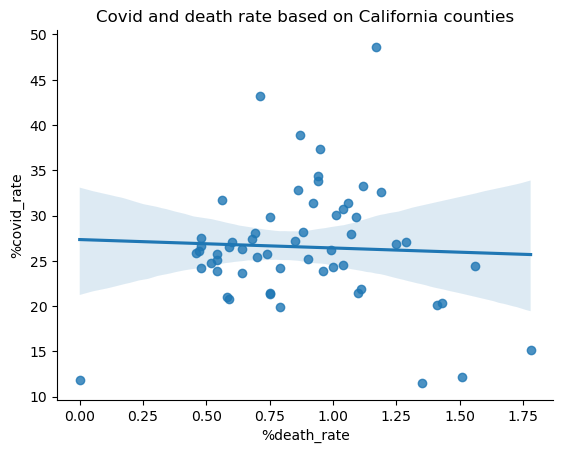

In [36]:
# Plot the rate for covid cases and death cases
sns.regplot(x = '%death_rate', y = '%covid_rate', data = ca_df)
plt.title('Covid and death rate based on California counties')
sns.despine()

In [37]:
# Find the top 3 largest counties based on population
ca_df.groupby('county')['population'].max().nlargest(3)

county
los angeles    9721138
san diego      3276208
orange         3151184
Name: population, dtype: int64

In [38]:
# Extract the number of cases recored in Los Angeles, San Diego, Orange County
la_df = ca_df[ca_df['county'] == 'los angeles']
sd_df = ca_df[ca_df['county'] == 'san diego']
oc_df = ca_df[ca_df['county'] == 'orange']

In [39]:
# Merge 3 largest counties dataframes
lasd_df = pd.concat([la_df, sd_df], axis=0)
ca_largest_df = pd.concat([lasd_df, oc_df], axis=0)
ca_largest_df.head()

,county,cases,deaths,%death_rate,population,%covid_rate
18,los angeles,3632440,34671.0,0.95,9721138,37.37
36,san diego,1040013,5829.0,0.56,3276208,31.74
29,orange,765292,7674.0,1.00,3151184,24.29


In [40]:
# Find the top 3 counties with higher covid19 rate
ca_df.groupby('county')['%covid_rate'].max().nlargest(3)

county
imperial    48.64
kings       43.18
lassen      38.86
Name: %covid_rate, dtype: float64

In [41]:
# Extract the number of cases recored in Imperial, Kings, Lassen County
ip_df = ca_df[ca_df['county'] == 'imperial']
kg_df = ca_df[ca_df['county'] == 'kings']
ls_df = ca_df[ca_df['county'] == 'lassen']

In [42]:
# Merge 3 counties dataframes
ipkg_df = pd.concat([ip_df, kg_df], axis=0)
ca_covid_df = pd.concat([ipkg_df, ls_df], axis=0)
ca_covid_df.head()

,county,cases,deaths,%death_rate,population,%covid_rate
12,imperial,86920,1020.0,1.17,178713,48.64
15,kings,66058,466.0,0.71,152981,43.18
17,lassen,11620,101.0,0.87,29904,38.86


In [45]:
# Create a dictionary with given data
total_ca_population = ca_df['population'].sum()
my_dict = {
    'county' : ['imperial', 'kings', 'lassen'],
    'population' : [178713, 152981, 29904],
    '%covid_rate' : [48.64, 42.18, 38.86]
}

population2 = [9721138, 3276208, 3151184]

list1 = [round((x / total_ca_population) * 100, 2) for x in population]
list2 = [round((y / total_ca_population) * 100, 2) for y in population2]

print("California counties and its population percentage")
for c, i, r in zip(ca_covid_df['county'], list1, ca_covid_df['%covid_rate']):
  print(f"County: {c}, Population %: {i}, Covid rate %: {r}")
for c, i, r in zip(ca_largest_df['county'], list2, ca_largest_df['%covid_rate']):
  print(f"County: {c}, Population %: {i}, Covid rate %: {r}")

NameError: name 'population' is not defined

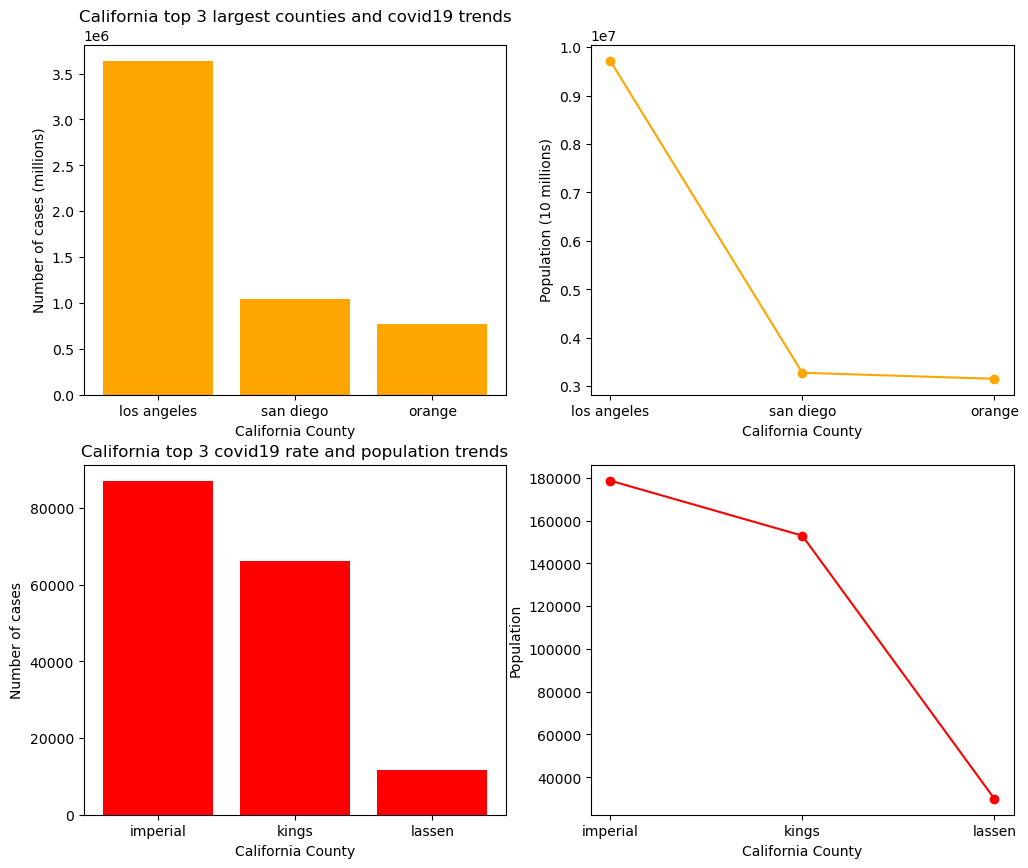

In [44]:
# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize = (12,10))

# The first bar chart for CA high population cases data
axs[0,0].bar(ca_largest_df['county'], ca_largest_df['cases'], color = 'orange')
axs[0,0].set_title('California top 3 largest counties and covid19 trends')
axs[0,0].set_ylabel('Number of cases (millions)')
axs[0,0].set_xlabel('California County')

# The second line plot for CA high population data
axs[0,1].plot(ca_largest_df['county'], ca_largest_df['population'], marker = 'o', c = 'orange')
axs[0,1].set_ylabel('Population (10 millions)')
axs[0,1].set_xlabel('California County')

# The third bar chart for CA top covid rate
axs[1,0].bar(ca_covid_df['county'], ca_covid_df['cases'], color = 'red')
axs[1,0].set_title('California top 3 covid19 rate and population trends')
axs[1,0].set_ylabel('Number of cases')
axs[1,0].set_xlabel('California County')

# The fourth bar chart for CA top covid rate counties population
axs[1,1].plot(ca_covid_df['county'], ca_covid_df['population'], marker = 'o', c = 'red')
axs[1,1].set_ylabel('Population')
axs[1,1].set_xlabel('California County')

plt.show()